# Evaluate the difference of average page numbers between party

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
politician_info_dir = "../data/qry_info_house_filter.csv"
politician_info = pd.read_csv(politician_info_dir)

In [4]:
results = pd.read_csv('/net/lazer/lab-lazer/shared_projects/google_audit_reproduce/intermedidate_files/merged_summary/day_qry_loc.csv')

In [5]:
qry_party_df = pd.merge(results, politician_info[['qry', 'party']].drop_duplicates(), how="inner", on='qry')

In [11]:
qry_party_df

,crawl_id,qry,loc_id,counts,party
0,20200901,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",6,Democrat
1,20200901,Abby Finkenauer,"AL-1,Alabama,United States",13,Democrat
2,20200901,Abby Finkenauer,"AL-2,Alabama,United States",14,Democrat
3,20200901,Abby Finkenauer,"AL-3,Alabama,United States",13,Democrat
4,20200901,Abby Finkenauer,"AL-4,Alabama,United States",14,Democrat
...,...,...,...,...,...
19943483,20201231,Zoe Lofgren,"WI-8,Wisconsin,United States",11,Democrat
19943484,20201231,Zoe Lofgren,"WV-1,West Virginia,United States",11,Democrat
19943485,20201231,Zoe Lofgren,"WV-2,West Virginia,United States",11,Democrat
19943486,20201231,Zoe Lofgren,"WV-3,West Virginia,United States",11,Democrat


In [7]:
qry_party_df['counts'].sum()

243169345

In [8]:
### Filter by party
page_dem = qry_party_df[qry_party_df['party']=='Democrat']

In [9]:
page_rep = qry_party_df[qry_party_df['party']=='Republican']

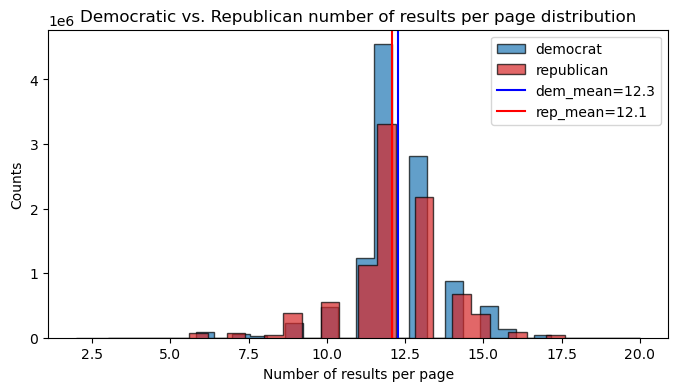

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))

plt.hist(page_dem['counts'], edgecolor='black', bins=30, 
         histtype='step', fill=True, color='#1f77b4', label='democrat', alpha = 0.7)
plt.hist(page_rep['counts'], edgecolor='black', bins=30, 
         histtype='step', fill=True, color='#d62728', label='republican', alpha = 0.7)


dem_weighted_avg = np.average(page_dem['counts'])
plt.axvline(x = dem_weighted_avg, color = 'b',label = 'dem_mean='+str(round(dem_weighted_avg, 1)))
rep_weighted_avg = np.average(page_rep['counts'])
plt.axvline(x = rep_weighted_avg, color = 'r',label = 'rep_mean='+str(round(rep_weighted_avg, 1)))
plt.legend()
 
plt.xlabel('Number of results per page')
plt.ylabel('Counts')
plt.title("Democratic vs. Republican number of results per page distribution")
plt.savefig("../data/plots/dem_rep_num_results_dist.png", bbox_inches='tight', dpi=200) 
plt.show()